In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

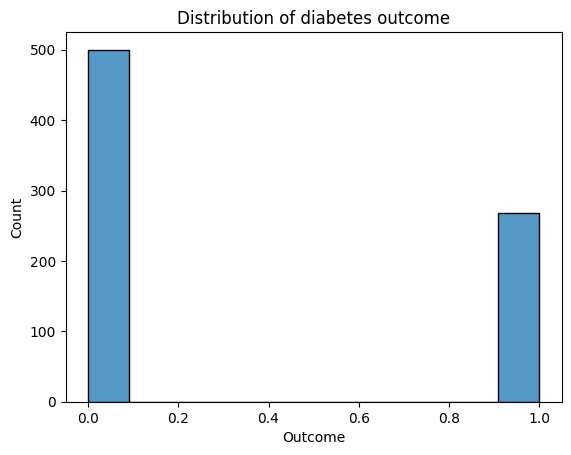

In [10]:
plt.title('Distribution of diabetes outcome')

sns.histplot(x='Outcome',data = df)

plt.show()

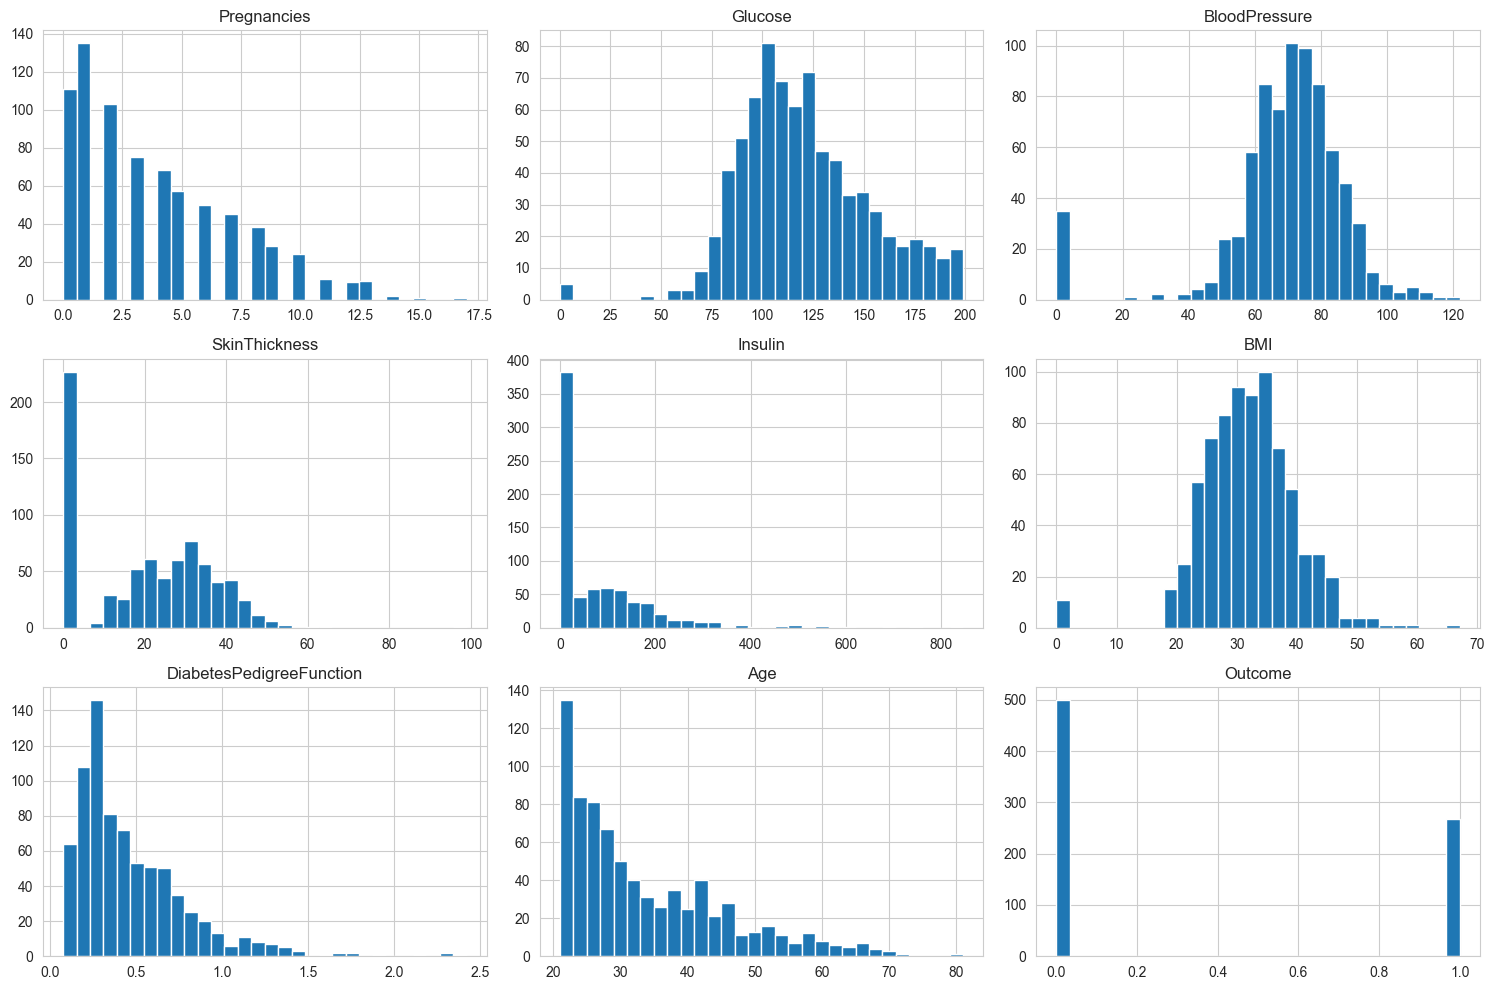

In [12]:
# The .hist() method on a DataFrame automatically creates a histogram for each numerical column.
# - figsize=(15, 10): This sets the overall size of the figure that will contain all our plots, making them readable.
# - bins=30: We are telling pandas to divide the data for each feature into 30 equal-width bins.
#   Choosing the number of bins is a bit of an art, but 30 is a good starting point to see detail without being too noisy.
# - layout=(3, 3): This arranges our 9 plots into a neat 3x3 grid.
df.hist(figsize=(15, 10), bins=30, layout=(3, 3))

# plt.tight_layout() is a handy function that automatically adjusts subplot params so that subplots are nicely fit in the figure.
# This prevents labels from one plot overlapping with another.
plt.tight_layout()

# Display the plots
plt.show()

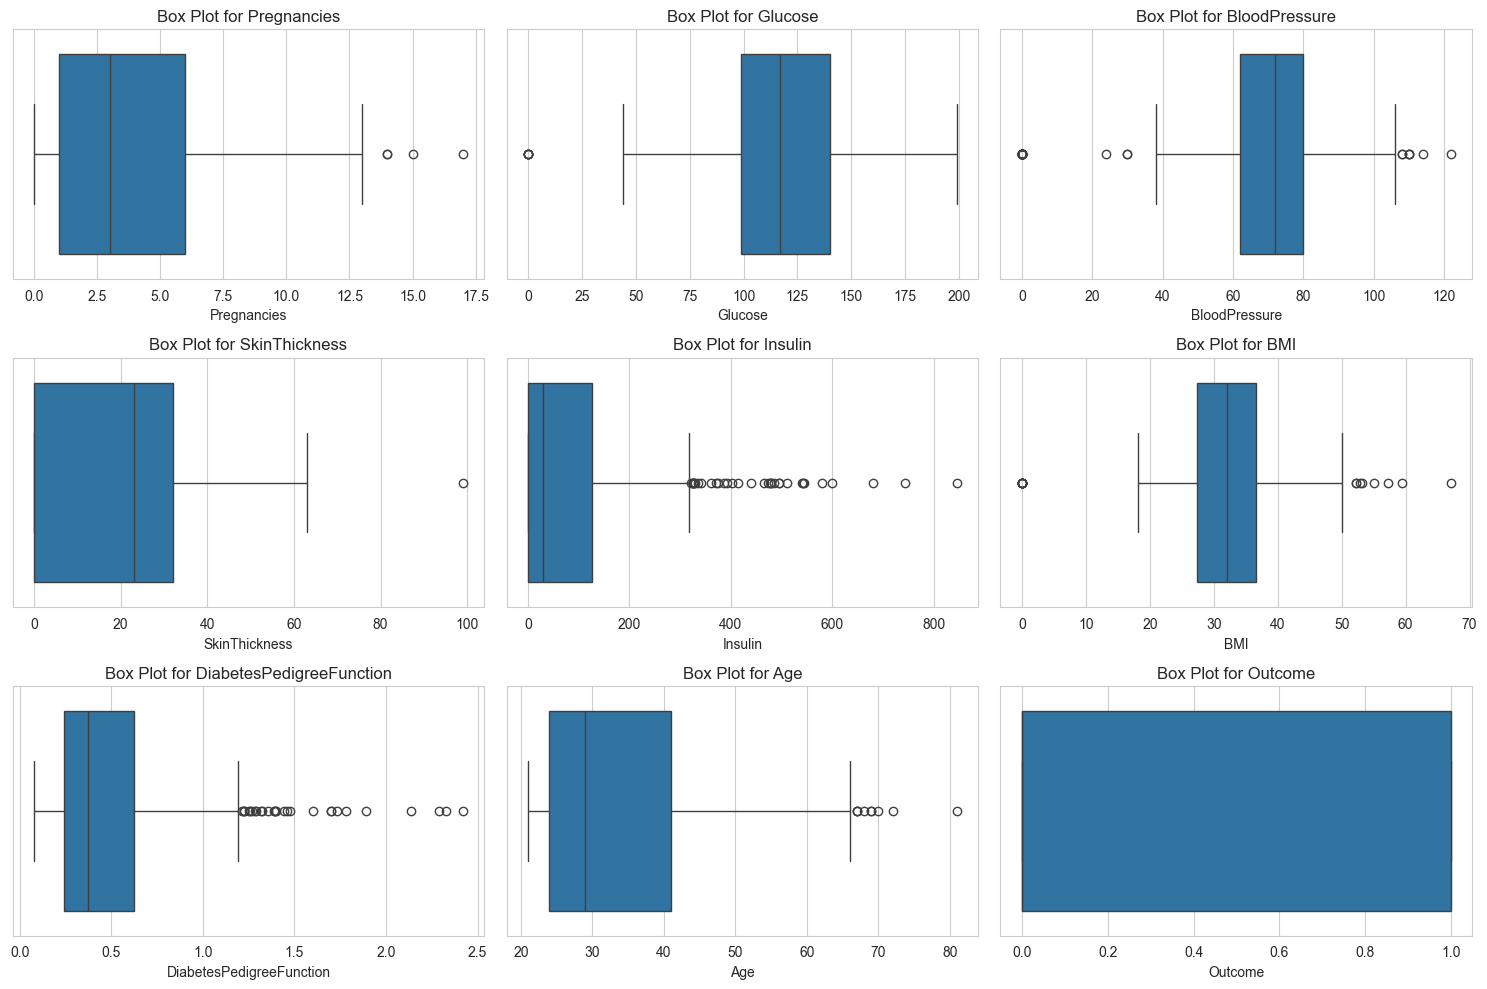

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, col in zip(axes.flatten(), df.columns):
    sns.boxplot(x=col, data=df, ax=ax)
    
    ax.set_title(f'Box Plot for {col}')
plt.tight_layout()
plt.show()

In [14]:
corr = df.corr()

In [15]:
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


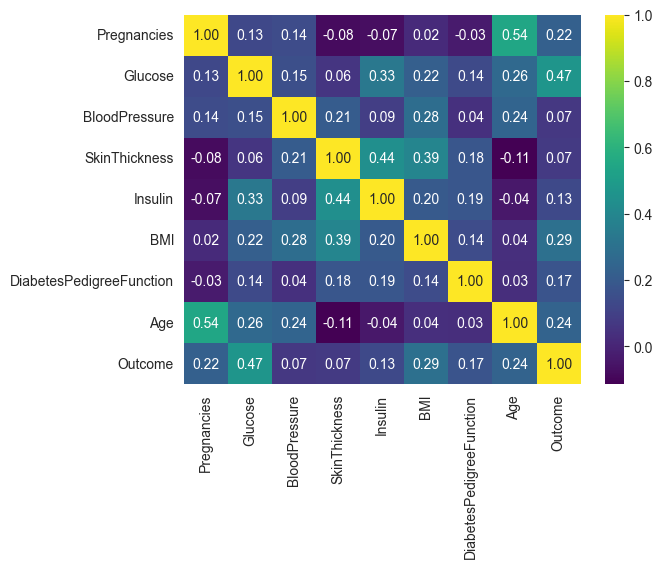

In [16]:
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f')
plt.show()

In [ ]:
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print("A peek at the data in the identified columns:")
df[columns_with_zeros].head(10)

A peek at the data in the identified columns:


,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148,72,35,0,33.6
1,85,66,29,0,26.6
2,183,64,0,0,23.3
3,89,66,23,94,28.1
4,137,40,35,168,43.1
5,116,74,0,0,25.6
6,78,50,32,88,31.0
7,115,0,0,0,35.3
8,197,70,45,543,30.5
9,125,96,0,0,0.0


In [18]:
df[columns_with_zeros] = df[columns_with_zeros].replace(0, np.nan)

In [19]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [20]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
imputer = SimpleImputer(strategy = 'median')

In [22]:
df[columns_with_zeros]= imputer.fit_transform(df[columns_with_zeros])

In [23]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 ,random_state = 42)

In [26]:
print("Shape of original X:", X.shape)
print("Shape of original y:", y.shape)
print("-" * 30)
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("-" * 30)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of original X: (768, 8)
Shape of original y: (768,)
------------------------------
Shape of X_train: (614, 8)
Shape of y_train: (614,)
------------------------------
Shape of X_test: (154, 8)
Shape of y_test: (154,)


In [28]:
scaler = StandardScaler()
df = scaler.fit(X_train)

In [29]:
df

,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [30]:
X_train_scaled = scaler.transform(X_train)
print("Learned Mean values for each feature (from X_train):")
print(scaler.mean_)

# The `scaler.scale_` attribute holds an array of the standard deviation values for each feature.
print("\nLearned Standard Deviation values for each feature (from X_train):")
print(scaler.scale_)

Learned Mean values for each feature (from X_train):
[  3.74267101 121.80781759  72.22964169  28.71172638 140.4771987
  32.35162866   0.46916775  32.90716612]

Learned Standard Deviation values for each feature (from X_train):
[ 3.31056497 30.08065495 12.08942121  8.40505273 88.12911742  6.92986895
  0.33657233 11.49406506]


In [31]:
X_test_scaled = scaler.fit_transform(X_test)

In [33]:
log = LogisticRegression()

In [34]:
log

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [35]:
log.fit(X_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [38]:
knn.fit(X_train_scaled, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [39]:
predlog = log.predict(X_test_scaled)

In [ ]:
print("First 20 predictions from the Logistic Regression model:")
print(predlog[:20])

print("\nFirst 20 true labels (y_test):")
print(y_test[:20].values)

First 20 predictions from the Logistic Regression model:
[0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1]

First 20 true labels (y_test):
[0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1]


--- Logistic Regression Classification Report ---
                  precision    recall  f1-score   support

Non-Diabetic (0)       0.80      0.85      0.82        99
    Diabetic (1)       0.69      0.62      0.65        55

        accuracy                           0.77       154
       macro avg       0.75      0.73      0.74       154
    weighted avg       0.76      0.77      0.76       154

\n--- Logistic Regression Confusion Matrix ---


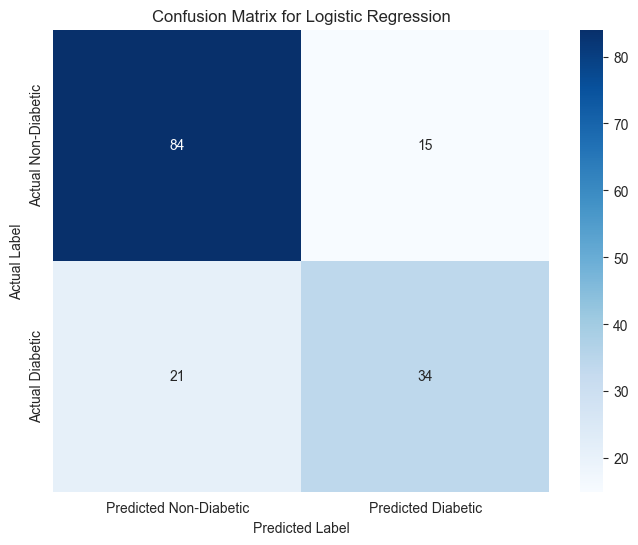

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

print("--- Logistic Regression Classification Report ---")
print(classification_report(y_test, predlog, target_names=['Non-Diabetic (0)', 'Diabetic (1)']))

# --- Generate and Visualize the Confusion Matrix ---
print("\\n--- Logistic Regression Confusion Matrix ---")
cm = confusion_matrix(y_test, predlog)

plt.figure(figsize=(8, 6)) 
sns.heatmap(cm, 
            annot=True,    
            fmt='d',         
            cmap='Blues',  
            xticklabels=['Predicted Non-Diabetic', 'Predicted Diabetic'],
            yticklabels=['Actual Non-Diabetic', 'Actual Diabetic'])

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


In [42]:
predknn = knn.predict(X_test_scaled)

In [43]:
print("First 20 predictions from the k-NN model:")
print(predknn[:20])

First 20 predictions from the k-NN model:
[1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1]


--- K-Nearest Neighbors (k-NN) Classification Report ---
                  precision    recall  f1-score   support

Non-Diabetic (0)       0.76      0.71      0.73        99
    Diabetic (1)       0.53      0.60      0.56        55

        accuracy                           0.67       154
       macro avg       0.65      0.65      0.65       154
    weighted avg       0.68      0.67      0.67       154


--- K-Nearest Neighbors (k-NN) Confusion Matrix ---


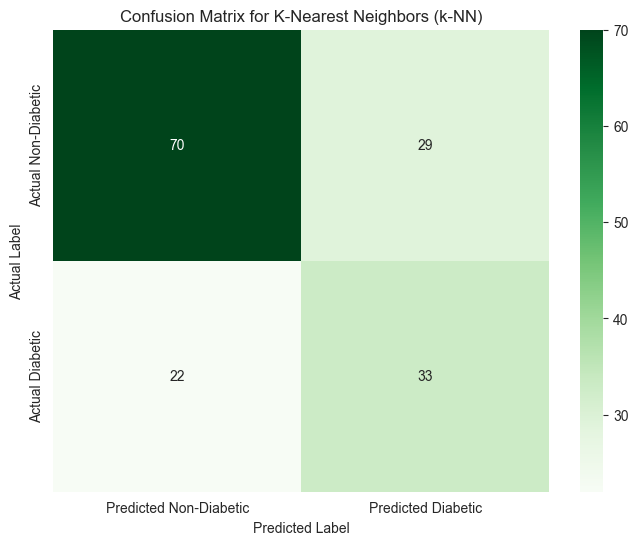

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("--- K-Nearest Neighbors (k-NN) Classification Report ---")
print(classification_report(y_test, predknn, target_names=['Non-Diabetic (0)', 'Diabetic (1)']))

print("\n--- K-Nearest Neighbors (k-NN) Confusion Matrix ---")
cm_knn = confusion_matrix(y_test, predknn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, 
            annot=True, 
            fmt='d', 
            cmap='Greens', 
            xticklabels=['Predicted Non-Diabetic', 'Predicted Diabetic'],
            yticklabels=['Actual Non-Diabetic', 'Actual Diabetic'])

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for K-Nearest Neighbors (k-NN)')
plt.show()

In [ ]:

report_log_reg = classification_report(y_test, predlog, target_names=['Non-Diabetic (0)', 'Diabetic (1)'], output_dict=True)

report_knn = classification_report(y_test, predknn, target_names=['Non-Diabetic (0)', 'Diabetic (1)'], output_dict=True)

f1_log_reg = report_log_reg['Diabetic (1)']['f1-score']
f1_knn = report_knn['Diabetic (1)']['f1-score']

print(f"--- F1-Score Comparison ---")
print(f"Logistic Regression F1-Score (Diabetic Class): {f1_log_reg:.4f}")
print(f"K-Nearest Neighbors F1-Score (Diabetic Class): {f1_knn:.4f}")

print("\\n--- Initial Conclusion ---")
if f1_log_reg > f1_knn:
    print("Based on the F1-Score, the Logistic Regression model is the initial best performer.")
elif f1_knn > f1_log_reg:
    print("Based on the F1-Score, the K-Nearest Neighbors model is the initial best performer.")
else:
    print("Based on the F1-Score, both models have nearly identical performance.")

--- F1-Score Comparison ---
Logistic Regression F1-Score (Diabetic Class): 0.6538
K-Nearest Neighbors F1-Score (Diabetic Class): 0.5641
\n--- Initial Conclusion ---
Based on the F1-Score, the Logistic Regression model is the initial best performer.


In [ ]:

tn_log_reg = cm[0, 0]
fp_log_reg = cm[0, 1]
fn_log_reg = cm[1, 0]
tp_log_reg = cm[1, 1]

tn_knn = cm_knn[0, 0]
fp_knn = cm_knn[0, 1]
fn_knn = cm_knn[1, 0]
tp_knn = cm_knn[1, 1]

print("--- Error Analysis: Logistic Regression vs. k-NN ---")
print("\\n--- Logistic Regression ---")
print(f"False Positives (Predicted Diabetic, Was Healthy): {fp_log_reg}")
print(f"False Negatives (Predicted Healthy, Was Diabetic): {fn_log_reg}  <-- MOST CRITICAL ERROR")

print("\\n--- K-Nearest Neighbors ---")
print(f"False Positives (Predicted Diabetic, Was Healthy): {fp_knn}")
print(f"False Negatives (Predicted Healthy, Was Diabetic): {fn_knn}  <-- MOST CRITICAL ERROR")

print("\\n--- Final Conclusion ---")
if fn_log_reg < fn_knn:
    print(f"The Logistic Regression model is the superior baseline.")
    print(f"It produced {fn_knn - fn_log_reg} fewer False Negatives, which is our primary concern.")
elif fn_knn < fn_log_reg:
    print(f"The K-Nearest Neighbors model is the superior baseline.")
    print(f"It produced {fn_log_reg - fn_knn} fewer False Negatives, which is our primary concern.")
else:
    print("Both models produced the same number of False Negatives.")
    print("We can fall back to the F1-score to make our final decision.")


--- Error Analysis: Logistic Regression vs. k-NN ---
\n--- Logistic Regression ---
False Positives (Predicted Diabetic, Was Healthy): 15
False Negatives (Predicted Healthy, Was Diabetic): 21  <-- MOST CRITICAL ERROR
\n--- K-Nearest Neighbors ---
False Positives (Predicted Diabetic, Was Healthy): 29
False Negatives (Predicted Healthy, Was Diabetic): 22  <-- MOST CRITICAL ERROR
\n--- Final Conclusion ---
The Logistic Regression model is the superior baseline.
It produced 1 fewer False Negatives, which is our primary concern.


In [48]:
tree = DecisionTreeClassifier()

In [49]:
tree.fit(X_train_scaled, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [50]:
predtree = tree.predict(X_test_scaled)

--- Decision Tree Classification Report ---
                  precision    recall  f1-score   support

Non-Diabetic (0)       0.78      0.74      0.76        99
    Diabetic (1)       0.57      0.62      0.59        55

        accuracy                           0.69       154
       macro avg       0.67      0.68      0.67       154
    weighted avg       0.70      0.69      0.70       154

\n--- Decision Tree Classification Confusion Matrix ---


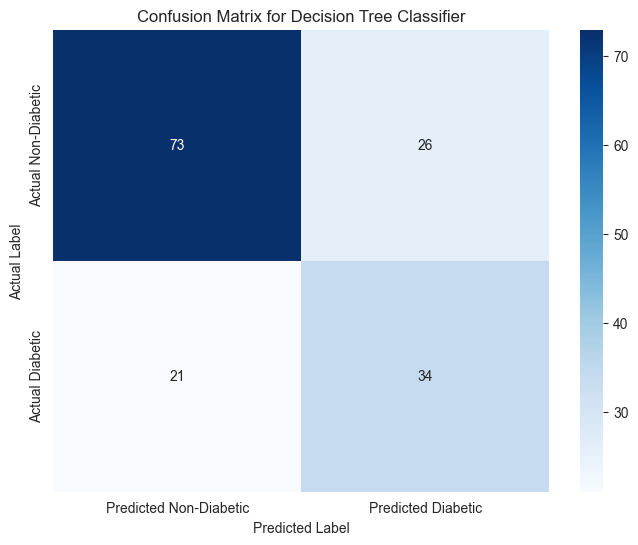

In [ ]:
# --- Generate the Classification Report ---
print("--- Decision Tree Classification Report ---")

print(classification_report(y_test, predtree, target_names=['Non-Diabetic (0)', 'Diabetic (1)']))

print("\\n--- Decision Tree Classification Confusion Matrix ---")
cm = confusion_matrix(y_test, predtree)

plt.figure(figsize=(8, 6)) 
sns.heatmap(cm, 
            annot=True,      
            fmt='d',         
            cmap='Blues',   
            xticklabels=['Predicted Non-Diabetic', 'Predicted Diabetic'],
            yticklabels=['Actual Non-Diabetic', 'Actual Diabetic'])

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()
